<h1>M. Nielsen, Chapter 6, 4th cnn model (relu)</h1>

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
import os
import numpy as np
import time
import random
import tensorflow as tf

In [7]:
from matplotlib import pyplot as plt

In [9]:
os.chdir(r"C:\Users\mchen\OneDrive\桌面\ml\code\tutorial\chapter3\20211119\multi_layer")

In [11]:
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

<h1>load data</h>

In [13]:
###############################################
#    load data from local directory
###############################################

train_x, train_y, val_x, val_y, test_x, test_y = [], [], [], [], [], []

training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

for tra in training_data:
    img_tra_x = tra[0].reshape(28,28).tolist()
    img_tra_y = np.array(np.argmax(tra[1]), dtype=np.uint8)
    train_x.append(img_tra_x)
    train_y.append(img_tra_y)
print(np.shape(train_x))

for val in validation_data:
    img_val_x = val[0].reshape(28,28)
#     img_val_y = np.array(np.argmax(val[1]), dtype=np.uint8)
    img_val_y = np.array(val[1], dtype=np.uint8)
    val_x.append(img_val_x)
    val_y.append(img_val_y)
print(np.shape(val_x))

for tes in test_data:
    img_tes_x = tes[0].reshape(28,28)
    img_tes_y = np.array(tes[1], dtype=np.uint8)
    test_x.append(img_tes_x)
    test_y.append(img_tes_y)
print(np.shape(test_x))


train_x = np.array(train_x)
val_x = np.array(val_x)
test_x = np.array(test_x)

train_y = np.array(train_y)
val_y = np.array(val_y)
test_y = np.array(test_y)

(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


In [15]:
# ###############################################
# #    checking data format:
# ###############################################
# plt.imshow(train_x[0], interpolation='none')
# plt.show()
# print('img label:', train_y[0])

# plt.imshow(val_x[0], interpolation='none')
# plt.show()
# print('img label:', val_y[0])

# plt.imshow(test_x[0], interpolation='none')
# plt.show()
# print('img label:', test_y[0])


<h1>Trying Implementing the relu CNN model as described in M. Nielsen, Chapter 6</h1>	

In [17]:
# >>> from network3 import ReLU
# >>> net = Network([
#         ConvPoolLayer(image_shape=(mini_batch_size, 1, 28, 28), 
#                       filter_shape=(20, 1, 5, 5), 
#                       poolsize=(2, 2), 
#                       activation_fn=ReLU),
#         ConvPoolLayer(image_shape=(mini_batch_size, 20, 12, 12), 
#                       filter_shape=(40, 20, 5, 5), 
#                       poolsize=(2, 2), 
#                       activation_fn=ReLU),
#         FullyConnectedLayer(n_in=40*4*4, n_out=100, activation_fn=ReLU),
#         SoftmaxLayer(n_in=100, n_out=10)], mini_batch_size)
# >>> net.SGD(training_data, 60, mini_batch_size, 0.03, 
#             validation_data, test_data, lmbda=0.1)

<h1>Reshape data</h1>

In [18]:
# reshape data
train_x = train_x.reshape(np.shape(train_x)[0], np.shape(train_x)[1], np.shape(train_x)[2], 1)
val_x = val_x.reshape(np.shape(val_x)[0], np.shape(val_x)[1], np.shape(val_x)[2], 1)
test_x = test_x.reshape(np.shape(test_x)[0], np.shape(test_x)[1], np.shape(test_x)[2], 1)

train_y = tf.one_hot(train_y.astype(np.int32), depth=10)
val_y = tf.one_hot(val_y.astype(np.int32), depth=10)
test_y = tf.one_hot(test_y.astype(np.int32), depth=10)

<h1>Build Network model (tanh)</h1>

In [24]:
################################################################
#   relu CNN network as described in chapter 6
################################################################
tf.random.set_seed(42)
################################################################

################################################################
# construct netwoek model

lmbda = 0.1

input_shape = (28, 28, 1)

model = tf.keras.models.Sequential()

model.add(
    tf.keras.layers.Conv2D( # no padding
        20,
        (5,5),
        activation=tf.nn.relu,
        kernel_regularizer=tf.keras.regularizers.L2(l2=lmbda),
        input_shape=input_shape
    )
)

model.add(
    tf.keras.layers.MaxPool2D(
        strides=(2,2)
    )
)

model.add(
    tf.keras.layers.Conv2D( # no padding
        40,
        (5,5),
        activation=tf.nn.relu,
        kernel_regularizer=tf.keras.regularizers.L2(l2=lmbda)
    )
)

model.add(
    tf.keras.layers.MaxPool2D(
        strides=(2,2)
    )
)

model.add(
    tf.keras.layers.Flatten()
)

model.add(
    tf.keras.layers.Dense(
        100,
        activation=tf.nn.relu,
        kernel_regularizer=tf.keras.regularizers.L2(l2=lmbda)
    )
)

model.add(
    tf.keras.layers.Dense(
        10,
        activation=tf.nn.softmax
    )
)
################################################################

################################################################
# compile model

eta = 0.03

model.compile(
    optimizer=tf.keras.optimizers.SGD(
        learning_rate=eta,
        momentum=0.0,
        nesterov=False,
        name="SGD"),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

################################################################
print('eta= {}\n'.format(eta))

model.summary()


eta= 0.03

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 24, 24, 20)        520       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 20)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 40)          20040     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 40)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 640)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               64100     
_________________________________________________________________
dense_9 (Dense)              (None, 10)    

<h1>Train Network</h1>

In [25]:
################################################################
# save the model when val_acc is best
checkpoint_filepath = r'C:\Users\mchen\OneDrive\桌面\ml\code\tutorial\chapter6\save_model\cnn_relu_l2\cnn_relu_l2'

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
################################################################

################################################################
#    train model  (how do i randomize mini_batches?)
batch_size = 10
n_eph = 60

ts = time.time()
history = model.fit(
    train_x, train_y, 
    epochs=n_eph,
    batch_size=batch_size,
    validation_data=(val_x, val_y),
    callbacks=[model_checkpoint_callback],
    shuffle=True
)
te = time.time()

print('total time:', te - ts)


acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
################################################################


################################################################
#    load the weights for the best epoch (best val accuracy)
model.load_weights(checkpoint_filepath)

################################################################

################################################################
#    evaluate test data at the best epoch
[test_data_loss, test_data_accuracy] = model.evaluate(
    test_x, test_y,
    batch_size=len(test_x)
)
################################################################


Epoch 1/60
5000/5000 [==============================] - 27s 5ms/step - loss: 1.3646 - accuracy: 0.8500 - val_loss: 0.8493 - val_accuracy: 0.8975
Epoch 2/60
5000/5000 [==============================] - 33s 7ms/step - loss: 0.8604 - accuracy: 0.8867 - val_loss: 0.7544 - val_accuracy: 0.9290
Epoch 3/60
5000/5000 [==============================] - 32s 6ms/step - loss: 0.8234 - accuracy: 0.8896 - val_loss: 0.8526 - val_accuracy: 0.8819
Epoch 4/60
5000/5000 [==============================] - 33s 7ms/step - loss: 0.8097 - accuracy: 0.8914 - val_loss: 0.7988 - val_accuracy: 0.8836
Epoch 5/60
5000/5000 [==============================] - 33s 7ms/step - loss: 0.7966 - accuracy: 0.8930 - val_loss: 0.7967 - val_accuracy: 0.8843
Epoch 6/60
5000/5000 [==============================] - 33s 7ms/step - loss: 0.7869 - accuracy: 0.8936 - val_loss: 0.7524 - val_accuracy: 0.9008
Epoch 7/60
5000/5000 [==============================] - 33s 7ms/step - loss: 0.7756 - accuracy: 0.8958 - val_loss: 0.6626 - val_ac

5000/5000 [==============================] - 32s 6ms/step - loss: 1.0454 - accuracy: 0.7754 - val_loss: 0.9264 - val_accuracy: 0.8096
Epoch 58/60
5000/5000 [==============================] - 33s 7ms/step - loss: 1.0434 - accuracy: 0.7752 - val_loss: 0.9645 - val_accuracy: 0.7998
Epoch 59/60
5000/5000 [==============================] - 32s 6ms/step - loss: 1.0404 - accuracy: 0.7757 - val_loss: 0.9348 - val_accuracy: 0.8280
Epoch 60/60
5000/5000 [==============================] - 32s 6ms/step - loss: 1.0422 - accuracy: 0.7754 - val_loss: 1.0252 - val_accuracy: 0.7859
total time: 1988.172775030136
1/1 [==============================] - 1s 696ms/step - loss: 0.6190 - accuracy: 0.9424


<h1>plot result<h1/>

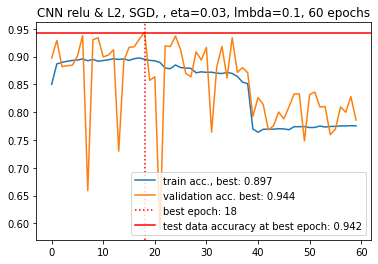

In [26]:
plt.plot(acc, label='train acc., best: {:.3f}'.format(max(acc)))
plt.plot(val_acc, label='validation acc. best: {:.3f}'.format(max(val_acc)))
plt.title('CNN relu & L2, SGD, , eta={}, lmbda={}, {} epochs'.format(eta, lmbda, n_eph))
plt.axvline(x=np.argmax(val_acc), c='r', ls=':', label='best epoch: {}'.format(np.argmax(val_acc)))
plt.axhline(y=test_data_accuracy, c='r', label='test data accuracy at best epoch: {:.3f}'.format(test_data_accuracy))
plt.legend()
plt.show()

from winsound import Beep
Beep(1000, 100)

<h1>Max accuracy= 94.2%<h1/><h1>Total time= 1988s<h1/>

In [28]:
print(acc)

[0.8500199913978577, 0.8866999745368958, 0.8896200060844421, 0.8914399743080139, 0.8930400013923645, 0.8936399817466736, 0.8957599997520447, 0.8924400210380554, 0.8949599862098694, 0.891539990901947, 0.8928200006484985, 0.8942800164222717, 0.8959199786186218, 0.894819974899292, 0.895799994468689, 0.8930400013923645, 0.8961399793624878, 0.8974800109863281, 0.895039975643158, 0.8931599855422974, 0.8923599720001221, 0.8892800211906433, 0.8792600035667419, 0.8781800270080566, 0.8848400115966797, 0.8802000284194946, 0.8792999982833862, 0.8788599967956543, 0.8708000183105469, 0.8725200295448303, 0.8716199994087219, 0.8718600273132324, 0.870199978351593, 0.8694599866867065, 0.8715599775314331, 0.8695399761199951, 0.8643400073051453, 0.8539800047874451, 0.8512200117111206, 0.7699000239372253, 0.7639399766921997, 0.7691799998283386, 0.769540011882782, 0.7694399952888489, 0.7702800035476685, 0.7698799967765808, 0.7684400081634521, 0.7738999724388123, 0.7738999724388123, 0.7740200161933899, 0.772

In [30]:
print(loss)

[1.364622712135315, 0.8603661060333252, 0.8233610391616821, 0.8096588253974915, 0.7965635657310486, 0.7868760228157043, 0.7756475806236267, 0.7760076522827148, 0.7697829008102417, 0.7754771113395691, 0.7729281187057495, 0.760039746761322, 0.7552501559257507, 0.7589422464370728, 0.7532668113708496, 0.768204391002655, 0.7516108751296997, 0.7533217072486877, 0.7546881437301636, 0.7622352242469788, 0.7686032652854919, 0.7781044244766235, 0.8075177073478699, 0.7900415062904358, 0.7800112366676331, 0.795413613319397, 0.7861353754997253, 0.7965940833091736, 0.8343677520751953, 0.8274831771850586, 0.8276070356369019, 0.8270121812820435, 0.8316249847412109, 0.8337340354919434, 0.8245090842247009, 0.8302403688430786, 0.8487169742584229, 0.8809372782707214, 0.8792567849159241, 1.0731052160263062, 1.0739206075668335, 1.0683844089508057, 1.0617458820343018, 1.0640732049942017, 1.0583648681640625, 1.0568569898605347, 1.0614715814590454, 1.0513865947723389, 1.0503146648406982, 1.051596760749817, 1.04

In [32]:
print(val_acc)

[0.8974999785423279, 0.9290000200271606, 0.8819000124931335, 0.8835999965667725, 0.8842999935150146, 0.9007999897003174, 0.9376000165939331, 0.6586999893188477, 0.9301000237464905, 0.933899998664856, 0.8992999792098999, 0.9027000069618225, 0.9121000170707703, 0.7297999858856201, 0.8927000164985657, 0.9164999723434448, 0.9175999760627747, 0.9314000010490417, 0.9437000155448914, 0.857200026512146, 0.8636000156402588, 0.5882999897003174, 0.9193000197410583, 0.9179999828338623, 0.9368000030517578, 0.911899983882904, 0.869700014591217, 0.8634999990463257, 0.9085000157356262, 0.8937000036239624, 0.9162999987602234, 0.7641000151634216, 0.8809999823570251, 0.9182999730110168, 0.8614000082015991, 0.9337999820709229, 0.8715999722480774, 0.8801000118255615, 0.8708999752998352, 0.7925000190734863, 0.8259999752044678, 0.8141000270843506, 0.7681000232696533, 0.7754999995231628, 0.8003000020980835, 0.7878000140190125, 0.809499979019165, 0.8327999711036682, 0.8328999876976013, 0.748199999332428, 0.831

In [33]:
print(val_loss)

[0.8493003845214844, 0.7543874382972717, 0.8525511622428894, 0.798774242401123, 0.7967297434806824, 0.7523938417434692, 0.6625600457191467, 1.4133549928665161, 0.6655104160308838, 0.6676896810531616, 0.7791136503219604, 0.7335255146026611, 0.8050400614738464, 1.1641770601272583, 0.8009809851646423, 0.7123228311538696, 0.6884735822677612, 0.6414836049079895, 0.6144055128097534, 0.8454450368881226, 0.8832899332046509, 1.9282575845718384, 0.6704576015472412, 0.667985200881958, 0.6225756406784058, 0.6926574110984802, 0.8082543611526489, 0.8098011016845703, 0.7303550839424133, 0.7798436880111694, 0.6896582245826721, 1.0892515182495117, 0.7895967960357666, 0.7505911588668823, 0.8587909936904907, 0.6396039128303528, 0.8022931218147278, 0.7556026577949524, 0.8136659860610962, 1.0168192386627197, 0.8954423666000366, 0.9472691416740417, 1.0805660486221313, 1.02370023727417, 0.9666383862495422, 1.0138477087020874, 0.9146457314491272, 0.8900362253189087, 0.875375509262085, 1.075615406036377, 0.916

In [38]:
sig_valid_acc = [0.9879999756813049, 0.987500011920929, 0.9879000186920166, 0.9879000186920166, 0.9878000020980835, 0.987500011920929, 0.988099992275238, 0.9883999824523926, 0.987500011920929, 0.988099992275238, 0.9879999756813049, 0.9879999756813049, 0.9878000020980835, 0.988099992275238, 0.9878000020980835, 0.9879000186920166, 0.9876000285148621, 0.9879999756813049, 0.9879999756813049, 0.9873999953269958, 0.9882000088691711, 0.9879000186920166, 0.9879000186920166, 0.9876000285148621, 0.9882000088691711, 0.988099992275238, 0.9876999855041504, 0.9879999756813049, 0.9879999756813049, 0.9883000254631042, 0.9879999756813049, 0.987500011920929, 0.9879999756813049, 0.9879999756813049, 0.9876999855041504, 0.988099992275238, 0.9876999855041504, 0.9883999824523926, 0.9879000186920166, 0.9879999756813049, 0.9879000186920166, 0.9879999756813049, 0.9878000020980835, 0.9879999756813049, 0.9878000020980835, 0.9878000020980835, 0.988099992275238, 0.9883000254631042, 0.9882000088691711, 0.9878000020980835, 0.9879999756813049, 0.9883000254631042, 0.9879000186920166, 0.9876999855041504, 0.9882000088691711, 0.9883000254631042, 0.988099992275238, 0.9879999756813049, 0.9882000088691711, 0.9882000088691711]

tanh_val__acc = [0.9817000031471252, 0.983299970626831, 0.9850000143051147, 0.9882000088691711, 0.988099992275238, 0.9897000193595886, 0.989799976348877, 0.9904000163078308, 0.9905999898910522, 0.991100013256073, 0.9908000230789185, 0.9908999800682068, 0.9908999800682068, 0.9909999966621399, 0.9908999800682068, 0.9908000230789185, 0.9909999966621399, 0.9909999966621399, 0.9908999800682068, 0.9908999800682068, 0.991100013256073, 0.9909999966621399, 0.9909999966621399, 0.991100013256073, 0.9908999800682068, 0.9908999800682068, 0.9908999800682068, 0.9909999966621399, 0.9909999966621399, 0.991100013256073, 0.9909999966621399, 0.991100013256073, 0.9909999966621399, 0.9909999966621399, 0.991100013256073, 0.991100013256073, 0.991100013256073, 0.991100013256073, 0.991100013256073, 0.9909999966621399, 0.9909999966621399, 0.9909999966621399, 0.9909999966621399, 0.9909999966621399, 0.9909999966621399, 0.9909999966621399, 0.9909999966621399, 0.9909999966621399, 0.991100013256073, 0.991100013256073, 0.9909999966621399, 0.991100013256073, 0.991100013256073, 0.991100013256073, 0.991100013256073, 0.991100013256073, 0.991100013256073, 0.991100013256073, 0.991100013256073, 0.991100013256073]

relu_val_l2_acc = [0.8974999785423279, 0.9290000200271606, 0.8819000124931335, 0.8835999965667725, 0.8842999935150146, 0.9007999897003174, 0.9376000165939331, 0.6586999893188477, 0.9301000237464905, 0.933899998664856, 0.8992999792098999, 0.9027000069618225, 0.9121000170707703, 0.7297999858856201, 0.8927000164985657, 0.9164999723434448, 0.9175999760627747, 0.9314000010490417, 0.9437000155448914, 0.857200026512146, 0.8636000156402588, 0.5882999897003174, 0.9193000197410583, 0.9179999828338623, 0.9368000030517578, 0.911899983882904, 0.869700014591217, 0.8634999990463257, 0.9085000157356262, 0.8937000036239624, 0.9162999987602234, 0.7641000151634216, 0.8809999823570251, 0.9182999730110168, 0.8614000082015991, 0.9337999820709229, 0.8715999722480774, 0.8801000118255615, 0.8708999752998352, 0.7925000190734863, 0.8259999752044678, 0.8141000270843506, 0.7681000232696533, 0.7754999995231628, 0.8003000020980835, 0.7878000140190125, 0.809499979019165, 0.8327999711036682, 0.8328999876976013, 0.748199999332428, 0.8314999938011169, 0.8363000154495239, 0.8094000220298767, 0.8100000023841858, 0.7595000267028809, 0.7692999839782715, 0.8095999956130981, 0.7997999787330627, 0.828000009059906, 0.7858999967575073]

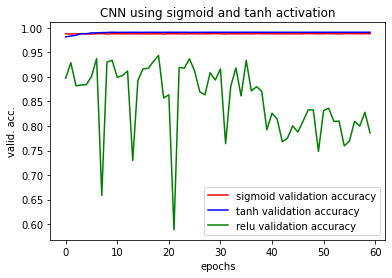

In [40]:
plt.title("CNN using sigmoid and tanh activation")
plt.plot(sig_valid_acc, c='r', label='sigmoid validation accuracy')
plt.plot(tanh_val__acc, c='b', label='tanh validation accuracy')
plt.plot(relu_val_l2_acc, c='g', label='relu validation accuracy')

plt.legend()
plt.xlabel('epochs')
plt.ylabel('valid. acc.')
plt.show()


<h1>M. Neilsen claims that relu is more accurate than sigmoid for MNIST problem, but I find the opposite to be true<h1/>
